#The ARIMA task to predict next 50 steps based on 100 first steps.

#Exploratory Data Analysis (EDA)

Data Uploading and Loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

this_seq_train = np.loadtxt('this_seq_train.csv', delimiter=',')
other_seqs = np.loadtxt('other_seqs.csv', delimiter=',')

Saving other_seqs.csv to other_seqs.csv
Saving this_seq_train.csv to this_seq_train.csv


Single and multiple Sequence Visualization of data

In [3]:
def plot_curve(data, title="Time Series Data"):
    plt.figure(figsize=(10, 5))
    plt.plot(data, label='Sequence')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

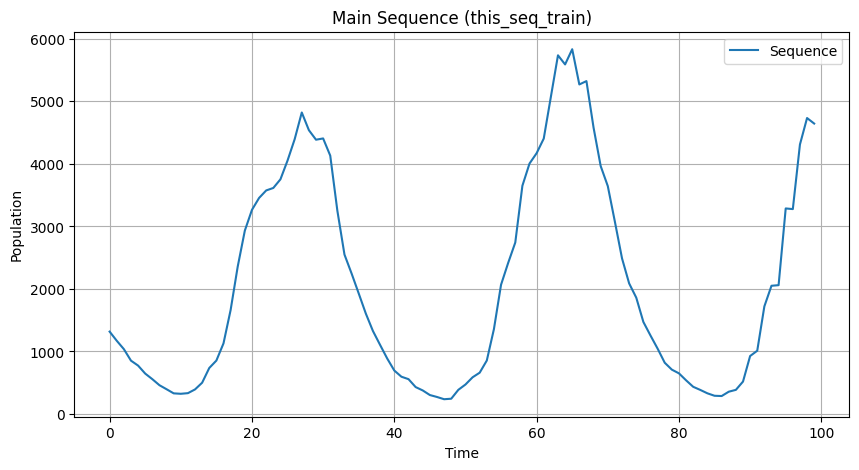

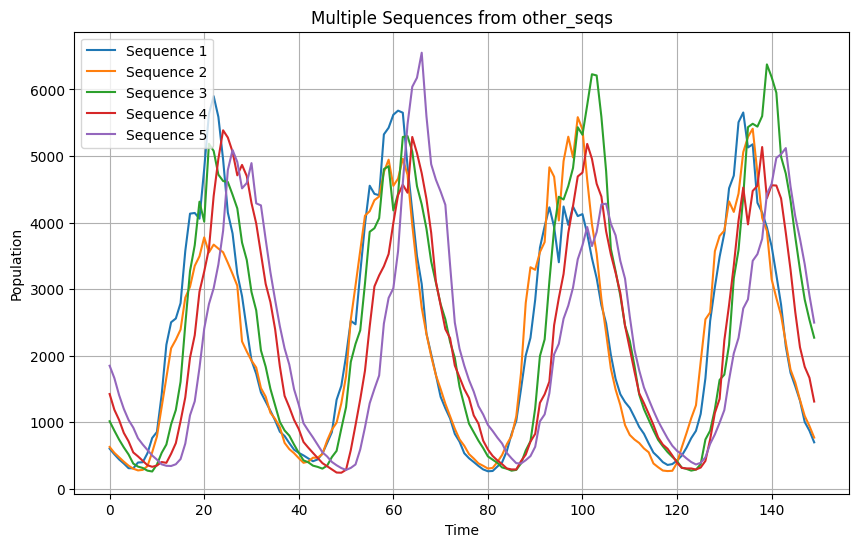

In [4]:

plot_curve(this_seq_train, title="Main Sequence (this_seq_train)")


plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(other_seqs[i], label=f'Sequence {i+1}')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Multiple Sequences from other_seqs')
plt.legend()
plt.grid()
plt.show()

In [5]:

this_seq_train = np.loadtxt('this_seq_train.csv', delimiter=',')
other_seqs = np.loadtxt('other_seqs.csv', delimiter=',')

Stat test

In [6]:

from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(this_seq_train)
print("pvalue = ", pvalue, " if above 0.05, data is not stationary")


pvalue =  0.0003570257442032615  if above 0.05, data is not stationary


#ARIMA Model Development and Forecasting Workflow

Importing libraries

In [7]:
!pip install pmdarima

import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.8 MB/s eta 0:00:00


Hyperparameter Grid Setup

Model Tuning with Grid Search

In [8]:
import itertools
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import warnings
from sklearn.preprocessing import MinMaxScaler


warnings.filterwarnings("ignore")

train_data = this_seq_train

p = range(0, 8)
d = range(0, 4)
q = range(0, 6)


pdq_combinations = list(itertools.product(p, d, q))

results = []
failed_combinations = []


for params in pdq_combinations:
    try:

        model = ARIMA(train_data, order=params)
        model_fit = model.fit(method_kwargs={'maxiter': 500})

        results.append((params, model_fit.aic))
    except Exception as e:

        failed_combinations.append((params, str(e)))
        continue


results_df = pd.DataFrame(results, columns=['Parameters', 'AIC'])


best_model = results_df.loc[results_df['AIC'].idxmin()]

print(f"Best ARIMA parameters: {best_model['Parameters']} with AIC: {best_model['AIC']}")


if failed_combinations:
    print("Failed parameter combinations:")
    for combo, error in failed_combinations:
        print(f"Parameters: {combo}, Error: {error}")


Best ARIMA parameters: (5, 0, 2) with AIC: 18.0


Forcasting and
Visualization


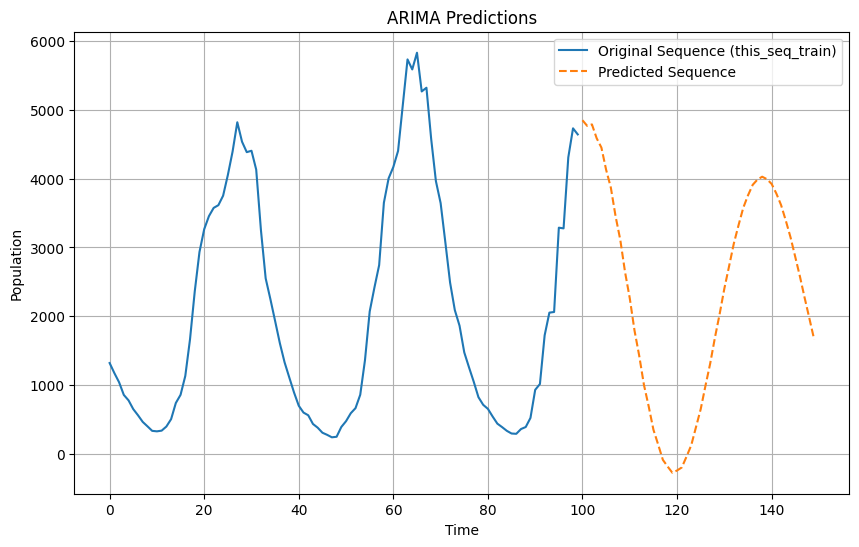

In [9]:
model = ARIMA(train_data, order=best_model['Parameters'])

model_fit = model.fit()

predictions = model_fit.forecast(steps=50)




plt.figure(figsize=(10, 6))
plt.plot(this_seq_train, label="Original Sequence (this_seq_train)")
plt.plot(range(len(this_seq_train), len(this_seq_train) + len(predictions)), predictions, label="Predicted Sequence", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("ARIMA Predictions")
plt.legend()
plt.grid()
plt.show()

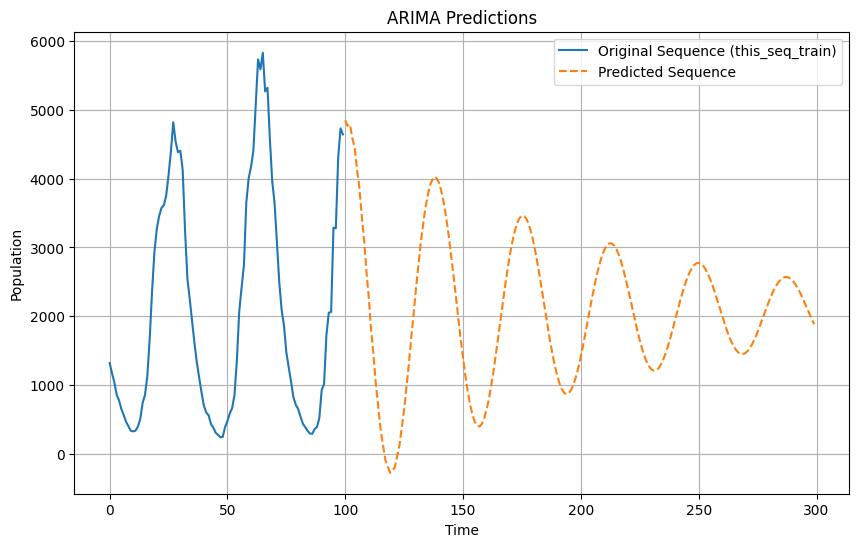

In [10]:
predictions = model_fit.forecast(steps=200)


plt.figure(figsize=(10, 6))
plt.plot(this_seq_train, label="Original Sequence (this_seq_train)")
plt.plot(range(len(this_seq_train), len(this_seq_train) + len(predictions)), predictions, label="Predicted Sequence", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("ARIMA Predictions")
plt.legend()
plt.grid()
plt.show()

# Slower damping with slightly different pdq combination

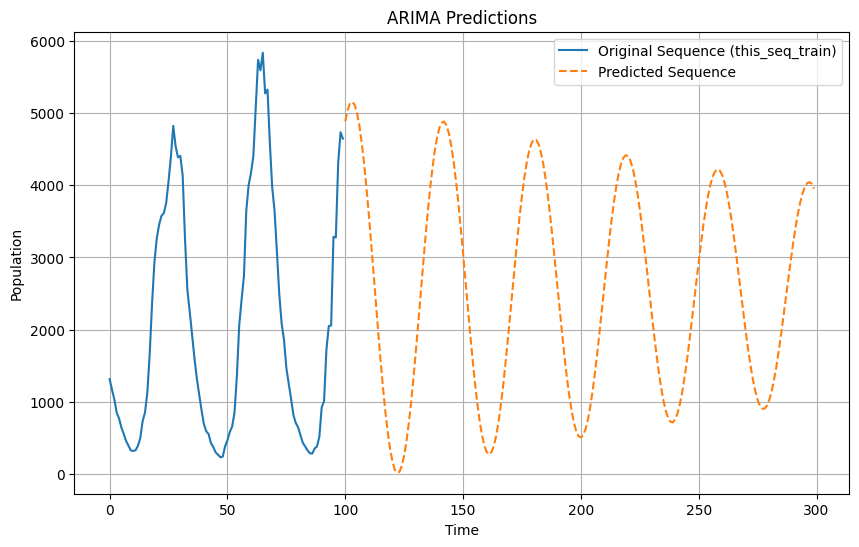

In [11]:
model = ARIMA(train_data, order=(3,1,4))
model_fit = model.fit()

predictions = model_fit.forecast(steps=200)


plt.figure(figsize=(10, 6))
plt.plot(this_seq_train, label="Original Sequence (this_seq_train)")
plt.plot(range(len(this_seq_train), len(this_seq_train) + len(predictions)), predictions, label="Predicted Sequence", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("ARIMA Predictions")
plt.legend()
plt.grid()
plt.show()

In [12]:
predictions_f = model_fit.forecast(steps=50)

np.savetxt('this_seq_pred_arima.csv', predictions_f, delimiter=',')
from google.colab import files
files.download('this_seq_pred_arima.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Predicting the average dynamics

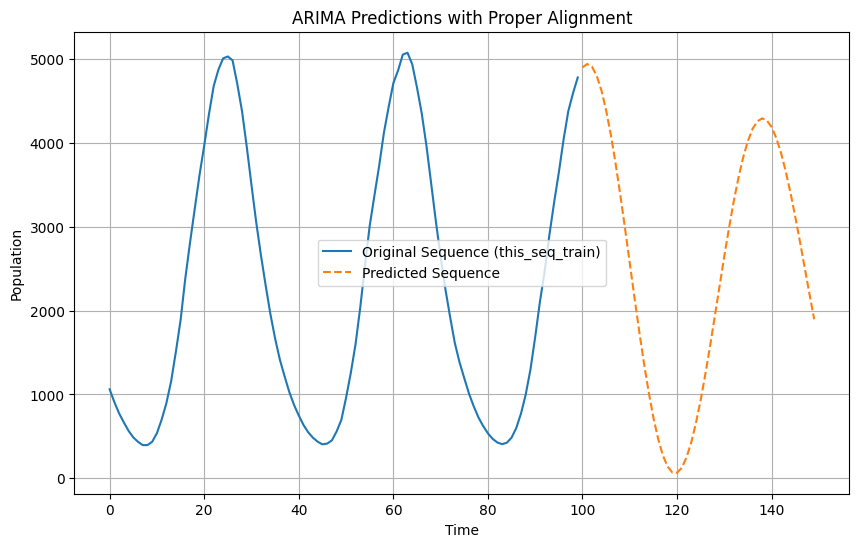

In [13]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


first_100_steps = [seq[:100] for seq in other_seqs]


average_series = np.mean(first_100_steps, axis=0)

train_data = pd.Series(average_series)


combined_train_data = pd.Series(average_series)

model = ARIMA(combined_train_data, order=(4, 1, 2))
model_fit = model.fit()


forecast = model_fit.forecast(steps=50)


plt.figure(figsize=(10, 6))
plt.plot(combined_train_data, label="Original Sequence (this_seq_train)")
plt.plot(range(len(this_seq_train), len(this_seq_train) + len(forecast)), forecast, label="Predicted Sequence", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("ARIMA Predictions with Proper Alignment")
plt.legend()
plt.grid()
plt.show()


Shape of average_next_50: (50,)


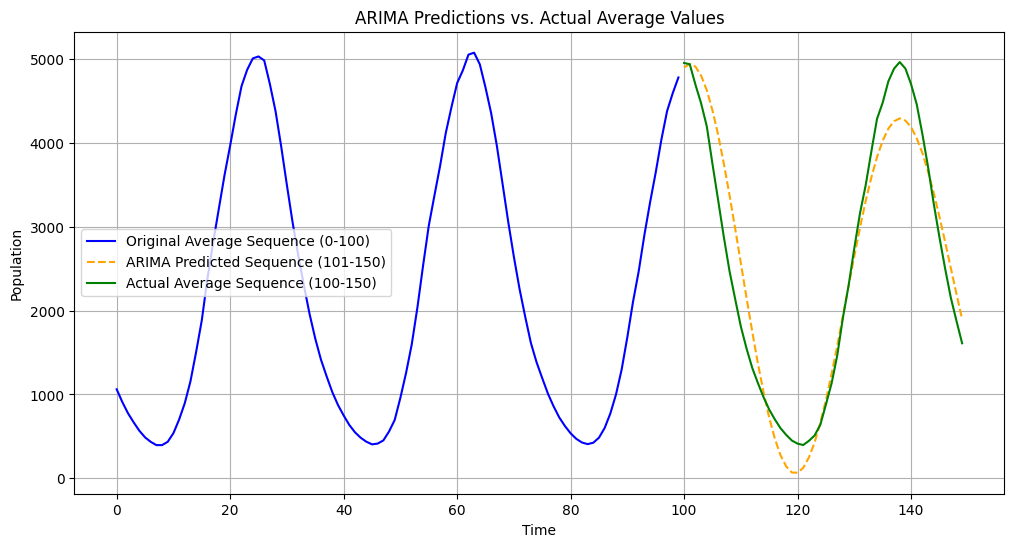

In [14]:
next_50_steps = np.array([seq[100:150] for seq in other_seqs if len(seq) >= 150])


if next_50_steps.shape[0] > 0:
    average_next_50 = np.mean(next_50_steps, axis=0)
else:
    raise ValueError("No valid sequences with 150 steps found in `other_seqs`.")


print(f"Shape of average_next_50: {average_next_50.shape}")


plt.figure(figsize=(12, 6))

plt.plot(train_data, label="Original Average Sequence (0-100)", color="blue")


plt.plot(range(100, 150), forecast, label="ARIMA Predicted Sequence (101-150)", linestyle="dashed", color="orange")


plt.plot(range(100, 150), average_next_50, label="Actual Average Sequence (100-150)", color="green")

plt.xlabel("Time")
plt.ylabel("Population")
plt.title("ARIMA Predictions vs. Actual Average Values")
plt.legend()
plt.grid()


plt.show()

# Final Remarks

ARIMA is able to predict the next 50 steps with reasonable performance, but it picks up a decay rate that seems to be stronger than that of the simulator judging based on other_seq data. It should be noted that a comprehensive conclussion definitely is going to need data with longer sequences. At this stage, however, it was not clear if such long times are of interest and this approach was not persued.



Additionally, more a different approach to identify best performing model from ARIMA family was implemented as below:

# Auto_ARIMA

In [15]:
!pip install pmdarima


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1281.869, Time=0.47 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1353.644, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1284.462, Time=0.68 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.66 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1273.465, Time=1.02 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1258.172, Time=8.26 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=1259.382, Time=15.06 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=4.35 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1267.087, Time=1.15 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1266.171, Time=0.93 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=1255.709, Time=4.57 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1270.397, Time=0.38 sec
 ARIMA(2,1,1)(2,1,1)[12]             : AIC=1256.482, Time=3.02 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=inf, Time=1.21 sec
 ARIMA(2,1,0)(2,1,0)[12]         

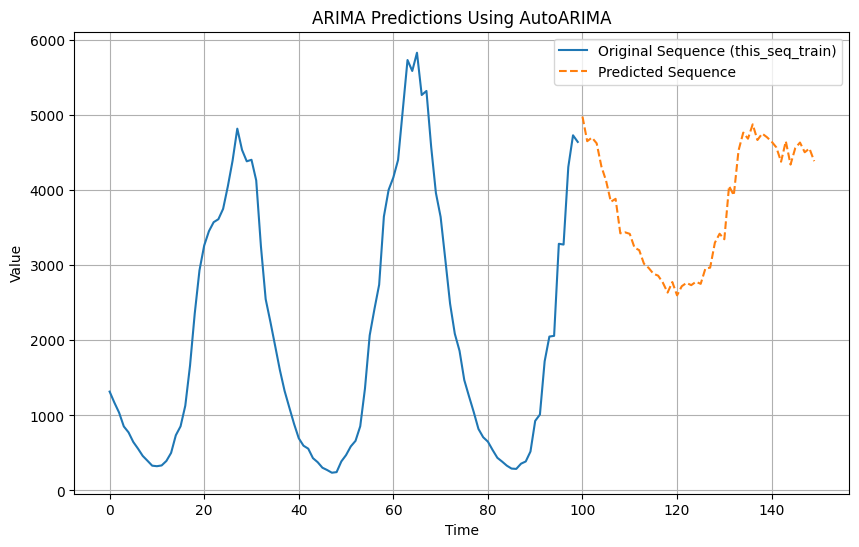

In [16]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt



arima_model = auto_arima(
    this_seq_train,
    start_p=1, d=1, start_q=1,
    max_p=5, max_q=5, max_d=2,
    m=12,
    start_P=0, D=1, start_Q=0, max_P=2, max_D=1, max_Q=2,
    seasonal=True,  # `seasonal=False`
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    n_fits=50
)


print(arima_model.summary())

forecast = arima_model.predict(n_periods=50)


plt.figure(figsize=(10, 6))
plt.plot(this_seq_train, label="Original Sequence (this_seq_train)")
plt.plot(range(len(this_seq_train), len(this_seq_train) + len(forecast)),
         forecast, label="Predicted Sequence", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("ARIMA Predictions Using AutoARIMA")
plt.legend()
plt.grid()
plt.show()


The best model identified by auto_arima does not work well.

# Scaling

 As a possible solution, training data where scaled and then ARIMA was traned and used for prediction, but the damping was still there (please see below).

Best ARIMA parameters: (2, 0, 1) with AIC: -195.38019947629283


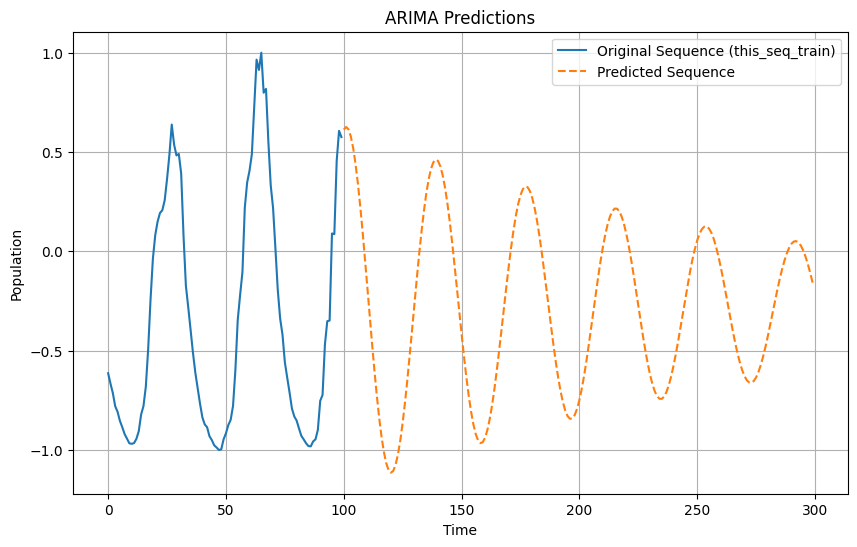

In [17]:
import itertools
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import warnings
from sklearn.preprocessing import MinMaxScaler


warnings.filterwarnings("ignore")

this_seq_train=pd.Series(this_seq_train)

scaler = MinMaxScaler(feature_range=(-1, 1))
this_seq_train = scaler.fit_transform(this_seq_train.values.reshape(-1, 1))


train_data = this_seq_train

p = range(0, 8)
d = range(0, 4)
q = range(0, 6)


pdq_combinations = list(itertools.product(p, d, q))


results = []
failed_combinations = []


for params in pdq_combinations:
    try:

        model = ARIMA(train_data, order=params)
        model_fit = model.fit(method_kwargs={'maxiter': 500})

        results.append((params, model_fit.aic))
    except Exception as e:
        # Log failed combinations for troubleshooting
        failed_combinations.append((params, str(e)))
        continue

results_df = pd.DataFrame(results, columns=['Parameters', 'AIC'])


best_model = results_df.loc[results_df['AIC'].idxmin()]

print(f"Best ARIMA parameters: {best_model['Parameters']} with AIC: {best_model['AIC']}")


if failed_combinations:
    print("Failed parameter combinations:")
    for combo, error in failed_combinations:
        print(f"Parameters: {combo}, Error: {error}")

model = ARIMA(train_data, order=best_model['Parameters']) # Use best parameters from optimization

model_fit = model.fit()

predictions = model_fit.forecast(steps=200)

plt.figure(figsize=(10, 6))
plt.plot(this_seq_train, label="Original Sequence (this_seq_train)")
plt.plot(range(len(this_seq_train), len(this_seq_train) + len(predictions)), predictions, label="Predicted Sequence", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("ARIMA Predictions")
plt.legend()
plt.grid()
plt.show()